<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR10 데이터의 인식**

Files already downloaded and verified
Files already downloaded and verified


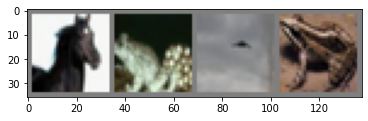

horse  frog plane  frog
[1,  2000] loss: 2.182
[1,  4000] loss: 1.891
[1,  6000] loss: 1.669
[1,  8000] loss: 1.586
[1, 10000] loss: 1.537
[1, 12000] loss: 1.474
[2,  2000] loss: 1.402
[2,  4000] loss: 1.393
[2,  6000] loss: 1.367
[2,  8000] loss: 1.345
[2, 10000] loss: 1.301
[2, 12000] loss: 1.308
[3,  2000] loss: 1.218
[3,  4000] loss: 1.234
[3,  6000] loss: 1.236
[3,  8000] loss: 1.223
[3, 10000] loss: 1.217
[3, 12000] loss: 1.186
[4,  2000] loss: 1.129
[4,  4000] loss: 1.129
[4,  6000] loss: 1.115
[4,  8000] loss: 1.134
[4, 10000] loss: 1.151
[4, 12000] loss: 1.125
[5,  2000] loss: 1.046
[5,  4000] loss: 1.053
[5,  6000] loss: 1.067
[5,  8000] loss: 1.074
[5, 10000] loss: 1.083
[5, 12000] loss: 1.073
[6,  2000] loss: 0.988
[6,  4000] loss: 1.019
[6,  6000] loss: 0.992
[6,  8000] loss: 1.024
[6, 10000] loss: 1.016
[6, 12000] loss: 1.037
[7,  2000] loss: 0.960
[7,  4000] loss: 0.953
[7,  6000] loss: 0.965
[7,  8000] loss: 0.952
[7, 10000] loss: 0.975
[7, 12000] loss: 0.991
[8,  2000]

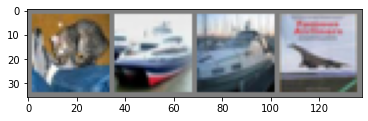

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship truck plane
Accuracy of the network on the 10000 test images: 60 %
Accuracy of plane : 67 %
Accuracy of   car : 71 %
Accuracy of  bird : 43 %
Accuracy of   cat : 45 %
Accuracy of  deer : 57 %
Accuracy of   dog : 44 %
Accuracy of  frog : 69 %
Accuracy of horse : 59 %
Accuracy of  ship : 73 %
Accuracy of truck : 76 %


In [ ]:
%matplotlib inline#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import torch#pytorch사용
import torchvision#torchvision에서 데이터셋 가져오기
import torchvision.transforms as transforms#다양한 이미지 변환 기능들을 제공

transform=transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]#(데이터 타입을 Tensor 형태로 변경,-1 ~ 1사이의 값으로 normalized 시킴)Compose로 구성

)
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)# 데이터 저장 위치:./data,True:train set,다운로드 아직 안받음,데이터 선처리 작업
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)#trainset을 4사이즈만큼 무작위로 불러옴

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)# 데이터 저장 위치:./data,True:test set,다운로드 아직 안받음,데이터 선처리 작업
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)#trainset을 4사이즈만큼 무작위가 아니게 불러옴

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')#데이터의 레이블링을 위해 

import matplotlib.pyplot as plt#시각화 위함
import numpy as np#배열 선언

def imshow(img):
 img = img / 2 + 0.5 # unnormalize
 npimg = img.numpy()#배열로 변환
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()#이미지 출력
# get some random training images
dataiter = iter(trainloader)#trainloader안의 실제값 확인
images, labels = dataiter.next()#데이터를 하나씩 불러옴
imshow(torchvision.utils.make_grid(images))#이미지 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))#라벨 출력

import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):#신경망을 정의
 def __init__(self):
  super(Net, self).__init__()#각 레이어들을 정의
  # nn.Conv2d(in_channels, out_channels/n_filters, kernel_size)
  self.conv1 = nn.Conv2d(3, 6, 5)#입력 노드가 3개,5x5 커널을 통해 컨볼루션,6개의 필터가 출력->28x28 크기의 이미지
  # nn.MaxPool2d(kernel_size, stride)
  self.pool = nn.MaxPool2d(2, 2)#2x2 크기로 Max 풀링->14x14크기의 이미지
  self.conv2 = nn.Conv2d(6, 16, 5)#입력 노드가 6개,5x5 커널을 통해 컨볼루션16개의 특징을 뽑아냄->10x10 크기의 이미지
  # nn.Linear(in_features, out_features)
  self.fc1 = nn.Linear(16 * 5 * 5, 120)#16개의 특징을 전달받고 이미지의 크기가 5x5,출력 노드는 120
  self.fc2 = nn.Linear(120, 84)#입력노드:120,출력 노드는 84
  self.fc3 = nn.Linear(84, 10)#입력노드:84,출력 노드는 10
 def forward(self, x):#제로 데이터를 입력받아 순서대로 활성화
  x = self.pool(F.relu(self.conv1(x)))#컨볼루션을 거친 후에 relu를 통해 활성화가 되고 풀링층으로 들어감
  x = self.pool(F.relu(self.conv2(x)))#컨볼루션을 거친 후에 relu를 통해 활성화가 되고 풀링층으로 들어감
  x = x.view(-1, 16 * 5 * 5)#view를 통해 텐서의 형태를 변환
  x = F.relu(self.fc1(x))#파라미터의 연산을 거친후 relu를 통해 활성화
  x = F.relu(self.fc2(x))#파라미터의 연산을 거친후 relu를 통해 활성화
  x = self.fc3(x)#마지막 레이어를 거친 후 출력
  return x
net = Net()#신경망을 사용하기위한 인스턴스를 선언

import torch.optim as optim# optimizer 사용 정의

criterion = nn.CrossEntropyLoss()# CrossEntropyLoss함수 통해 손실함수를 정의
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)#다음 파라미터를 업데이트 하기위해 최적화 함수를 정의

for epoch in range(10): # loop over the dataset multiple times
 running_loss = 0.0#loss값 초기화
 for i, data in enumerate(trainloader, 0):  # traindata 불러오기(배치 형태로 들어옴)
  # get the inputs; data is a list of [inputs, labels]
  inputs, labels = data#레이닝 데이터를 입력이미지와 라벨을 각각의 변수에 저장
  optimizer.zero_grad()# optimizer 초기화
  outputs = net(inputs)# net에 input 이미지 넣어서 output 나오기
  loss = criterion(outputs, labels)# output로 loss값 계산
  loss.backward()# loss를 기준으로 미분자동계산
  optimizer.step()# optimizer 계산
  running_loss += loss.item()# loss값 누적
  if i % 2000 == 1999: # print every 2000 mini-batches
    print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))#loss값 출력
    running_loss = 0.0#loss값 초기화
print('Finished Training')

dataiter = iter(testloader)#trainloader안의 실제값 확인
images, labels = dataiter.next()#데이터를 하나씩 불러옴
imshow(torchvision.utils.make_grid(images))# 이미지 출력
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))# 정답(label) 출력

outputs = net(images)#신경망 예측
_, predicted = torch.max(outputs, 1)#가장 높은 값을 갖는 인덱스 뽑음
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))# 예측 결과 출력

correct = 0
total = 0
with torch.no_grad():
 for data in testloader:
  images, labels = data#레이닝 데이터를 입력이미지와 라벨을 각각의 변수에 저장
  outputs = net(images)# net에 input 이미지 넣어서 output 나오기
  _, predicted = torch.max(outputs.data, 1)#가장 높은 값을 갖는 인덱스 뽑음
  total += labels.size(0)
  correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

class_correct = list(0. for i in range(10))#class별 정확도
class_total = list(0. for i in range(10))#class_total개수
with torch.no_grad():
 for data in testloader:
  images, labels = data#레이닝 데이터를 입력이미지와 라벨을 각각의 변수에 저장
  outputs = net(images)# net에 input 이미지 넣어서 output 나오기
  _, predicted = torch.max(outputs, 1)#가장 높은 값을 갖는 인덱스 뽑음
  c = (predicted == labels).squeeze()#배열에서 1차원인 축을 제거
  for i in range(4):
    label = labels[i]#라벨 정의
    class_correct[label] += c[i].item()#c배열 대응 값
    class_total[label] += 1#전체수 1씩 증가시킴
for i in range(10):
 print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))#정확도 출력




**AlexNet을 이용한 전이 학습**

fatal: destination path 'imagenet-small' already exists and is not an empty directory.
Size of dataset:1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([4, 3, 224, 224]) torch.Size([4])


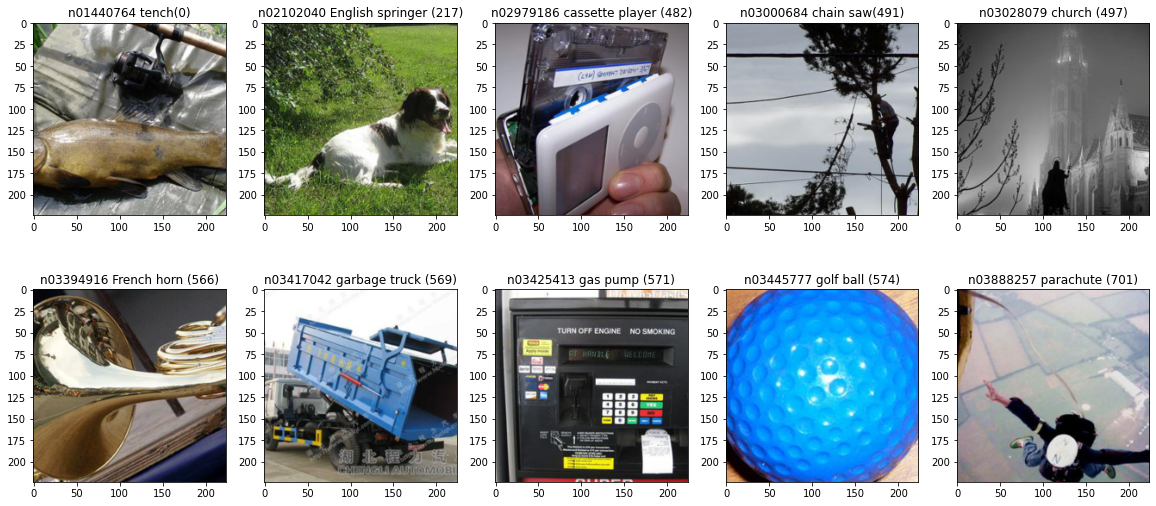

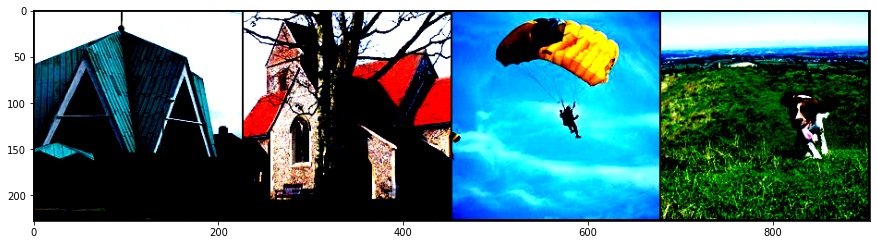

tensor([497, 497, 701, 217])
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, ou

In [ ]:
import torch#pytorch사용
import torch.nn as nn#신경망 사용
from torch.hub import load_state_dict_from_url#사전 훈련 된 가중치 불러옴
import torchvision#torchvision에서 데이터셋 가져오기
import torchvision.transforms as transforms#다양한 이미지 변환 기능들을 제공
from torch.utils.data import Dataset, DataLoader#데이터셋을 나타내는 추상클래스,batch를 만드는 부분을 수정
import torch.optim as optim# optimizer 사용 정의
import matplotlib.pyplot as plt#시각화 위함
import numpy as np#배열 사용
__all__ = ['AlexNet', 'alexnet']#외부 인터페이스

model_urls = {
    'alexnet': 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',#지정주소에서 training model다운로드 
}
!git clone https://github.com/jlee581/imagenet-small.git
class ImageNetSubset(Dataset):
  def __init__(self,data_dir):
    self.transform=transforms.Compose(#Compose로 구성
        [transforms.Resize(256),#이미지 사이즈 256으로 변경
         transforms.CenterCrop(224),#가운데 부분을 224크기로 자름
         transforms.ToTensor(),#tensor로 변환
         transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])#이미지를 정규화
    self.data_dir=data_dir#data_dir정의
    self.data_set=torchvision.datasets.ImageFolder(root=self.data_dir,transform=self.transform)#계층적인 폴더 구조를 가지고 있는 데이터셋을 불러올 때 사용
  def __len__(self):   
      return len(self.data_set)#data_set길이 반환
  
  def __getitem__(self,idx):
    data=self.data_set[idx]#데이터 정의
    image=data[0]#이미지 정의
    label=data[1]#라벨 정의

    label_dict={0:0,1:217,2:482,3:491,4:497,
                5:566,6:569,7:571,8:574,9:701}#10개 라벨에대한 dictionary생성
    label=label_dict[label]#라벨 설정
    return {"input":image,"label":label}#라벨과 이미지 반환
test_dir='./imagenet-small/test'#test dictionary경로 설정
testset=ImageNetSubset(test_dir)#testset 설정
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=True,num_workers=2)#testset을 4사이즈만큼 무작위로 불러옴
print("Size of dataset:%d"%len(testset))#testset사이즈 출력

def imshow(im):
  mean=torch.tensor([0.485,0.456,0.406],dtype=torch.float32)#float32형으로 텐서 변환
  std=torch.tensor([0.229,0.224,0.225],dtype=torch.float32)#float32형으로 텐서 변환

  inverse_normalize=transforms.Normalize((-mean/std).tolist(),(1.0/std).tolist())#정규화
  output=inverse_normalize(im).numpy()#배열로 변환
  output=np.clip(output,0,1)#최소:0 최대:1기준으로 output값들 바꿔줌
  plt.imshow(np.transpose(output,(1,2,0)))#2번째 차원 → 0번째 차원으로 변경한것 출력
  
label_list=['n01440764 tench(0)','n02102040 English springer (217)','n02979186 cassette player (482)',
            'n03000684 chain saw(491)','n03028079 church (497)','n03394916 French horn (566)',
            'n03417042 garbage truck (569)','n03425413 gas pump (571)','n03445777 golf ball (574)',
            'n03888257 parachute (701)']#label_list설정
fig=plt.figure(figsize=(20,9))#가로 20 세로 9로 설정
for ix in range(10):
  data=testset[ix*100]#데이터 설정
  inputs=data['input']#입력 설정
  labels=label_list[ix]#라벨 설정
  ax=fig.add_subplot(2,5,ix+1)#2x5 subplot에서 ix+1번째 subplot
  ax.set_title(labels)#라벨을 제목으로 설정
  imshow(inputs)#입력값 출력
for i,sample in enumerate(testloader):
  print(i,sample['input'].size(),sample['label'].size())#입력과 라벨의 크기 출력

  inputs,labels=sample['input'],sample['label']#입력과 라벨 설정
  plt.figure(figsize=(15,5))#가로 15 세로 5 설정
  grid=torchvision.utils.make_grid(inputs)#grid tensor만듬
  plt.imshow(grid.numpy().transpose((1,2,0)))#grid배열 2번째 차원 → 0번째 차원으로 변경한것 출력
  plt.show()#그래프 출력
  print(labels)#라벨 출력
  break

class AlexNet(nn.Module):

    def __init__(self, num_classes: int = 1000) -> None:
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            #입력 채널 : 3 , 출력 채널 : 64, 커널 크기 : 11, stride : 4, padding : 2
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True), # inplace=True 하면, inplace 연산을 수행함, inplace 연산은 결과값을 새로운 변수에 값을 저장하는 대신 기존의 데이터를 대체하는것을 의미
            # nn.MaxPool2d(kernel_size, stride)
            nn.MaxPool2d(kernel_size=3, stride=2),#커널 크기:3, stride : 2
            #입력 채널 : 64 , 출력 채널 : 192, 커널 크기 : 5, padding : 2
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            nn.MaxPool2d(kernel_size=3, stride=2),#커널 크기:3, stride : 2
            #입력 채널 : 192 , 출력 채널 : 384, 커널 크기 : 3, padding : 1
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            #입력 채널 : 384 , 출력 채널 : 256, 커널 크기 : 3, padding : 1
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            #입력 채널 : 256 , 출력 채널 : 256, 커널 크기 : 3, padding : 1
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            nn.MaxPool2d(kernel_size=3, stride=2),#커널 크기:3, stride : 2
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))#6x6출력으로 평균값 계산
        self.classifier = nn.Sequential(
            nn.Dropout(),#드롭아웃
            nn.Linear(256 * 6 * 6, 4096),#256개의 특징을 전달받고 이미지의 크기가 6x6,출력 노드는 4096
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            nn.Dropout(),#드롭아웃
            nn.Linear(4096, 4096),#입력노드:4096,출력 노드는 4096
            nn.ReLU(inplace=True),# inplace=True 하면, inplace 연산을 수행
            nn.Linear(4096, num_classes),#입력노드:4096,출력 노드는 num_classes
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)#특징 추출 부분
        x = self.avgpool(x)#출력 shape : (batch size * 256(channel), 6, 6)
        x = torch.flatten(x, 1)#평활화
        #출력 shape (batch_size, 256 * 6* 6)
        x = self.classifier(x)#분류
        return x

def alexnet(pretrained = False, progress=True, **kwargs):
  model = AlexNet(**kwargs)#모델 정의
  if pretrained:
      state_dict = load_state_dict_from_url(model_urls['alexnet'], progress=progress)#역직렬화된 state_dict 
      model.load_state_dict(state_dict)#모델의 매개변수들을 불러옴
  return model

model=alexnet(pretrained=True)#모델정의
print(model)#모델 출력

assert torch.cuda.is_available()#cuda가 사용가능한지 확인
model.cuda()#모델 CUDA operations들을 설정하고 실행

total=0
correct_class=np.zeros(10)#10으로 초기화
testloader=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True,num_workers=2)#testset을 1사이즈만큼 무작위로 불러옴
label_reverse_dict={0:0,217:1,482:2,491:3,497:4,
                    566:5,569:6,571:7,574:8,701:9}
with torch.no_grad():
  for data in testloader:
    inputs,labels=data['input'],data['label']#입력과 라벨 설정
    inputs=inputs.cuda()#입력 CUDA operations들을 설정하고 실행
    labels=labels.cuda()#라벨 CUDA operations들을 설정하고 실행
    outputs=model(inputs)#입력 모델 설계한것을 출력으로 설정
    _,predicted=torch.max(outputs.data,1)#가장 높은 값을 갖는 인덱스 뽑음
    total+=labels.size(0)# Batch Size만큼을 반환
    class_ix=label_reverse_dict[labels.item()]#label의 역 dictionary설정
    if predicted==labels:
      correct_class[class_ix]+=1#예측과 맞으면 정확 클래스 1더함
correct=sum(correct_class)#정확도 더함
print('Accuracy of the Network on the test set: %d %%'%(100*correct/total))#test set정확도 출력
print(total)#총합 출력
print(correct)#정확도 출력
print(correct_class)#정확한 클래스 개수 출력

train_dir='./imagenet-small/train'#train dictionary경로 설정
train_set=ImageNetSubset(train_dir)#train_set설정
trainloader=torch.utils.data.DataLoader(train_set,batch_size=16,shuffle=True,num_workers=2)#train_set을 16사이즈만큼 무작위로 불러옴
print("Training set size:%d"%len(train_set))#Training set크기 설정

assert torch.cuda.is_available()#cuda가 사용가능한지 확인
model.cuda()#모델 CUDA operations들을 설정하고 실행
criterion = nn.CrossEntropyLoss()# CrossEntropyLoss함수 통해 손실함수를 정의
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9,weight_decay=0.0005)#다음 파라미터를 업데이트 하기위해 최적화 함수를 정의

for epoch in range(2): # loop over the dataset multiple times
 running_loss = 0.0#loss값 초기화
 for i, data in enumerate(trainloader, 0):
  inputs,labels=data['input'],data['label']#입력과 라벨 설정
  inputs=inputs.cuda()#입력 CUDA operations들을 설정하고 실행
  labels=labels.cuda()#라벨 CUDA operations들을 설정하고 실행
  optimizer.zero_grad()# optimizer 초기화
  outputs = model(inputs)#입력 모델 설계한것을 출력으로 설정
  loss = criterion(outputs, labels)#손실도 정의
  loss.backward()#역전파 단계
  optimizer.step()#매개변수 갱신
  running_loss += loss.item()#손실도 계산
  if i % 100 == 99: # every 100 mini-batches
    print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))#손실도 출력
    running_loss = 0.0#loss값 초기화
print('Finished Training')

assert torch.cuda.is_available()#cuda가 사용가능한지 확인
model.cuda()#모델 CUDA operations들을 설정하고 실행

total=0
correct_class=np.zeros(10)#10으로 초기화
testloader=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True,num_workers=2)#testset을 1사이즈만큼 무작위로 불러옴
label_reverse_dict={0:0,217:1,482:2,491:3,497:4,566:5,569:6,571:7,574:8,701:9}#label의 역 dictionary설정

with torch.no_grad():
 for data in testloader:
  inputs,labels=data['input'],data['label']#입력과 라벨 설정
  inputs=inputs.cuda()#입력 CUDA operations들을 설정하고 실행
  labels=labels.cuda()#라벨 CUDA operations들을 설정하고 실행
  outputs = model(inputs)#입력 모델 설계한것을 출력으로 설정
  _, predicted = torch.max(outputs.data, 1)#가장 높은 값을 갖는 인덱스 뽑음
  total+=labels.size(0)# Batch Size만큼을 반환
  class_ix=label_reverse_dict[labels.item()]]#label의 역 dictionary설정
  if predicted==labels:
    correct_class[class_ix]+=1#예측과 맞으면 정확 클래스 1더함
correct=sum(correct_class)#정확도 더함
print('Accuracy of the Network on the test set: %d %%'%(100*correct/total))#test set정확도 출력
print(total)#총합 출력
print(correct)#정확도 출력
print(correct_class)#정확한 클래스 개수 출력

**ResNet을 이용한 전이 학습**

--2021-05-21 07:30:47--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.24.42, 13.35.24.56, 13.35.24.100, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.24.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip.1’

hymenoptera_data.zi 100%[===================>]  45.10M  90.9MB/s    in 0.5s    

2021-05-21 07:30:47 (90.9 MB/s) - ‘hymenoptera_data.zip.1’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
replace hymenoptera_data/train/ants/0013035.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


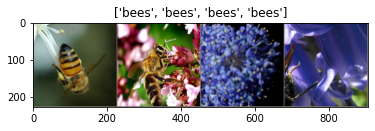

Epoch 0/24
----------
train Loss: 0.6461 Acc: 0.6557
val Loss: 0.3168 Acc: 0.8824

Epoch 1/24
----------
train Loss: 0.5471 Acc: 0.7951
val Loss: 0.4059 Acc: 0.8627

Epoch 2/24
----------
train Loss: 0.5052 Acc: 0.7951
val Loss: 0.2523 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.5362 Acc: 0.7910
val Loss: 0.3857 Acc: 0.8758

Epoch 4/24
----------
train Loss: 0.8536 Acc: 0.7295
val Loss: 0.2513 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.3994 Acc: 0.8566
val Loss: 0.2378 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.5300 Acc: 0.7787
val Loss: 0.6108 Acc: 0.8366

Epoch 7/24
----------
train Loss: 0.9437 Acc: 0.7295
val Loss: 0.4561 Acc: 0.8366

Epoch 8/24
----------
train Loss: 0.5575 Acc: 0.7787
val Loss: 0.2573 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.4626 Acc: 0.8238
val Loss: 0.3223 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.4675 Acc: 0.8443
val Loss: 0.2591 Acc: 0.9020

Epoch 11/24
----------
train Loss: 0.4400 Acc: 0.8156
val Loss: 0.2387 Acc: 0.9150

Ep

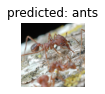

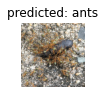

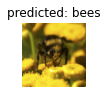

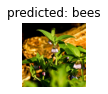

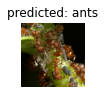

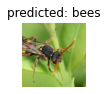

Epoch 0/24
----------
train Loss: 0.6952 Acc: 0.6680
val Loss: 0.3390 Acc: 0.8301

Epoch 1/24
----------
train Loss: 0.4833 Acc: 0.7623
val Loss: 0.2012 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.4137 Acc: 0.8443
val Loss: 0.2246 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.4954 Acc: 0.7869
val Loss: 0.2149 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4310 Acc: 0.8033
val Loss: 0.3018 Acc: 0.8824

Epoch 5/24
----------
train Loss: 0.4341 Acc: 0.8197
val Loss: 0.3349 Acc: 0.8758

Epoch 6/24
----------
train Loss: 0.5808 Acc: 0.7623
val Loss: 0.2570 Acc: 0.9216

Epoch 7/24
----------
train Loss: 0.5771 Acc: 0.7910
val Loss: 0.2311 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.5009 Acc: 0.7869
val Loss: 0.3034 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.4845 Acc: 0.8033
val Loss: 0.1837 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.4999 Acc: 0.8074
val Loss: 0.1896 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.4941 Acc: 0.7951
val Loss: 0.1756 Acc: 0.9477

Ep

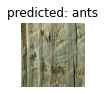

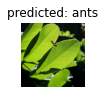

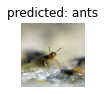

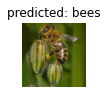

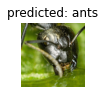

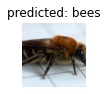

In [2]:
import torch#pytorch사용
import torch.nn as nn#신경망 사용
import torch.optim as optim# optimizer 사용 정의
from torch.optim import lr_scheduler#스케줄러 클래스
import numpy as np#배열 사용
import torchvision#torchvision에서 데이터셋 가져오기
from torchvision import datasets,models,transforms
import matplotlib.pyplot as plt#시각화
import time#시간 다룸
import os#os모듈호출
import copy#복사 위함
plt.ion()# 대화형 모드

!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip#hymenoptera_data.zip가져옴
!unzip hymenoptera_data.zip#zip파일 압축 해제


data_transforms = {
    'train': transforms.Compose([#Compose로 구성
        transforms.RandomResizedCrop(224),#이미지 사이즈 224으로 변경
        transforms.RandomHorizontalFlip(),#이미지를 랜덤으로 수평으로 이미지 뒤집음
        transforms.ToTensor(),#tensor로 변환
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([#Compose로 구성
        transforms.Resize(256),#이미지 사이즈 256으로 변경
        transforms.CenterCrop(224),#가운데 부분을 224크기로 자름
        transforms.ToTensor(),#tensor로 변환
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])#이미지를 정규화
    ]),
}


data_dir = 'hymenoptera_data'#hymenoptera_data로 data dictionary설정
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}#data_dir:train,x:val로 transform해서 dictionary형태로 image_datasets정의
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)#image_datasets을 4사이즈만큼 무작위로 불러와  dictionary형태로 dataloaders정의
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}#image_datasets의 길이를 dictionary형태로 dataset_sizes정의
class_names = image_datasets['train'].classes#train클래스를 class_names으로 정의

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#cuda가 사용가능하면 cuda:0 아니면 cpu 

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))#배열 2번째 차원 → 0번째 차원으로 변경한것 
    mean = np.array([0.485, 0.456, 0.406])#[0.485, 0.456, 0.406]로 평균 배열 설정
    std = np.array([0.229, 0.224, 0.225])#[0.229, 0.224, 0.225]로 표준편차 배열 설정
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)#최소:0 최대:1기준으로 inp값들 바꿔줌
    plt.imshow(inp)#역transfomation 이미지 출력
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다림

inputs, classes = next(iter(dataloaders['train']))#training data를 batch size=4를 한꺼번에 읽어와서 저장

out = torchvision.utils.make_grid(inputs)#grid tensor만듬

imshow(out, title=[class_names[x] for x in classes])#out결과 출력

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()#현재 시간 설정

    best_model_wts = copy.deepcopy(model.state_dict())#model.state_dict()를 깊은 복사
    best_acc = 0.0#정확도 초기화

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))#에포크 출력
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':#train이면 
                model.train()  # 모델을 학습 모드로 설정
            else:#val이면
                model.eval()   # 모델을 평가 모드로 설정

            running_loss = 0.0#손실도 초기화
            running_corrects = 0#정확도 초기화

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)#inputs모델 불러옴
                labels = labels.to(device)#labels모델 불러옴

                optimizer.zero_grad()# optimizer 초기화

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)#입력 모델 설계한것을 출력으로 설정
                    _, preds = torch.max(outputs, 1)#가장 높은 값을 갖는 인덱스 뽑음
                    loss = criterion(outputs, labels)#손실도 정의

                    # backward + optimize only if in training phase
                    if phase == 'train':#train이면
                        loss.backward()#역전파 단계
                        optimizer.step()#매개변수 갱신

                running_loss += loss.item() * inputs.size(0)#손실도 계산
                running_corrects += torch.sum(preds == labels.data)#정확도 계산

            epoch_loss = running_loss / dataset_sizes[phase]#epoch손실도 계산
            epoch_acc = running_corrects.double() / dataset_sizes[phase]#epoch정확도 계산
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))#epoch손실도,정확도 출력

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc#epoch_acc를 best_acc로 정의
                best_model_wts = copy.deepcopy(model.state_dict())#model.state_dict()을 깊은 복사

        print()

    time_elapsed = time.time() - since#경과 시간 설정
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))#경과 시간 출력
    print('Best val Acc: {:4f}'.format(best_acc))#best_acc출력

    model.load_state_dict(best_model_wts)#best model가중치 
    return model

def visualize_model(model, num_images=6):
  was_training = model.training#training모델로 설정
  model.eval()# 모델을 평가 모드로 설정
  images_so_far = 0
  fig = plt.figure()#시각화 

  with torch.no_grad():
      for i, (inputs, labels) in enumerate(dataloaders['val']):# 데이터를 반복
          inputs = inputs.to(device)#inputs모델 불러옴
          labels = labels.to(device)#labels모델 불러옴

          outputs = model(inputs)#입력 모델 설계한것을 출력으로 설정
          _, preds = torch.max(outputs, 1)#가장 높은 값을 갖는 인덱스 뽑음

          for j in range(inputs.size()[0]):
              images_so_far += 1
              ax = plt.subplot(num_images//2, 2, images_so_far)
              ax.axis('off')
              ax.set_title('predicted: {}'.format(class_names[preds[j]]))#예상 class_names출력
              imshow(inputs.cpu().data[j])#이미지 출력

              if images_so_far == num_images:#num_images이랑 맞으면
                  model.train(mode=was_training)#모델을 학습
                  return
      model.train(mode=was_training)#모델을 학습

model_ft = models.resnet18(pretrained=True)#사전 학습된 ResNet18가져오기
num_ftrs = model_ft.fc.in_features#모델에서 feature extraction 후 FC층에 입력되는 특징수
model_ft.fc = nn.Linear(num_ftrs, 2)#출력 샘플의 크기는 2로 설정

model_ft = model_ft.to(device)#cpu나 GPU에 model_ft할당

criterion = nn.CrossEntropyLoss()# CrossEntropyLoss함수 통해 손실함수를 정의
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)#다음 파라미터를 업데이트 하기위해 최적화 함수를 정의

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)# 7 에폭마다 0.1씩 학습률 감소
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)#25번만큼 학습 수행
visualize_model(model_ft)#model_ft시각화

model_conv = torchvision.models.resnet18(pretrained=True)#사전 학습된 ResNet18가져오기
for param in model_conv.parameters():
    param.requires_grad = False#사전 학습된 모델의 가중치를 상수로 고정

num_ftrs = model_conv.fc.in_features#모델에서 feature extraction 후 FC층에 입력되는 특징수
model_conv.fc = nn.Linear(num_ftrs, 2)#출력 샘플의 크기는 2로 설정

model_conv = model_conv.to(device)#cpu나 GPU에 model_conv할당
criterion = nn.CrossEntropyLoss()# CrossEntropyLoss함수 통해 손실함수를 정의
.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)#다음 파라미터를 업데이트 하기위해 최적화 함수를 정의

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)# 7 에폭마다 0.1씩 학습률 감소
model_conv = train_model(model_conv, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=25)#25번만큼 학습 수행

visualize_model(model_conv)#model_conv시각화

plt.ioff()#대화형 모드 끔
plt.show()#그래프 출력